In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
df = pd.read_table('Data/RFP/Sequence_to_Expression.txt')
df.head()

,Date,Time,Media,Ec,OD600,Ex485Em535,Ex550Em630
0,2025_04_25,330_PM,M9,33,0.314510,383540.0,5355.5
1,2025_04_25,330_PM,M9,33,0.340022,388601.0,4213.5
2,2025_04_25,330_PM,M9,34,0.180372,472020.0,92525.5
3,2025_04_25,330_PM,M9,34,0.170433,467968.0,83579.5
4,2025_04_25,330_PM,M9,35,0.083273,124494.0,337765.5


In [3]:
seq_map = pd.read_table('Data/RFP/Sequences.txt')

df = df[df['Ec'] != 'Blank']

df.loc[:, 'Ec'] = df['Ec'].astype(int)
seq_map.loc[:, 'Ec'] = seq_map['Ec'].astype(int)

df = df.merge(seq_map, on='Ec', how='left')

# create a new column for the relative expression
df['Rel_GFP'] = df['Ex485Em535'] / df['OD600']
df['Rel_RFP'] = df['Ex550Em630'] / df['OD600']

df.head()

,Date,Time,Media,Ec,OD600,Ex485Em535,Ex550Em630,Description,sequence,Rel_GFP,Rel_RFP
0,2025_04_25,330_PM,M9,33,0.314510,383540.0,5355.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.219483e+06,1.702805e+04
1,2025_04_25,330_PM,M9,33,0.340022,388601.0,4213.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.142869e+06,1.239184e+04
2,2025_04_25,330_PM,M9,34,0.180372,472020.0,92525.5,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,2.616918e+06,5.129690e+05
3,2025_04_25,330_PM,M9,34,0.170433,467968.0,83579.5,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,2.745755e+06,4.903944e+05
4,2025_04_25,330_PM,M9,35,0.083273,124494.0,337765.5,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,1.495011e+06,4.056124e+06


In [4]:
merged_df = df.merge(seq_map, on=['Ec', 'Description', 'sequence'], how='left')
merged_df

,Date,Time,Media,Ec,OD600,Ex485Em535,Ex550Em630,Description,sequence,Rel_GFP,Rel_RFP
0,2025_04_25,330_PM,M9,33,0.314510,383540.00,5355.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.219483e+06,1.702805e+04
1,2025_04_25,330_PM,M9,33,0.340022,388601.00,4213.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.142869e+06,1.239184e+04
2,2025_04_25,330_PM,M9,34,0.180372,472020.00,92525.5,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,2.616918e+06,5.129690e+05
3,2025_04_25,330_PM,M9,34,0.170433,467968.00,83579.5,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,2.745755e+06,4.903944e+05
4,2025_04_25,330_PM,M9,35,0.083273,124494.00,337765.5,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,1.495011e+06,4.056124e+06
...,...,...,...,...,...,...,...,...,...,...,...
417,2025_05_02,530_PM,M9,103,0.999028,560499.25,3209509.5,P1000_del14T,TTGACAAGGAGGT_ATAATTTATAATAATAGTGTGG,5.610448e+05,3.212634e+06
418,2025_05_02,530_PM,M9,108,0.475248,641222.25,2892171.5,p800,TTGACGGGTATATTATACTGTATACTATCAGTGTGG,1.349238e+06,6.085607e+06
419,2025_05_02,530_PM,M9,108,0.489327,649588.25,2903152.5,p800,TTGACGGGTATATTATACTGTATACTATCAGTGTGG,1.327512e+06,5.932944e+06
420,2025_05_02,530_PM,M9,109,0.864723,502621.25,3786890.5,P1000,TTGACAAGGAGGTTATAATTTATAATAATAGTGTGG,5.812511e+05,4.379310e+06


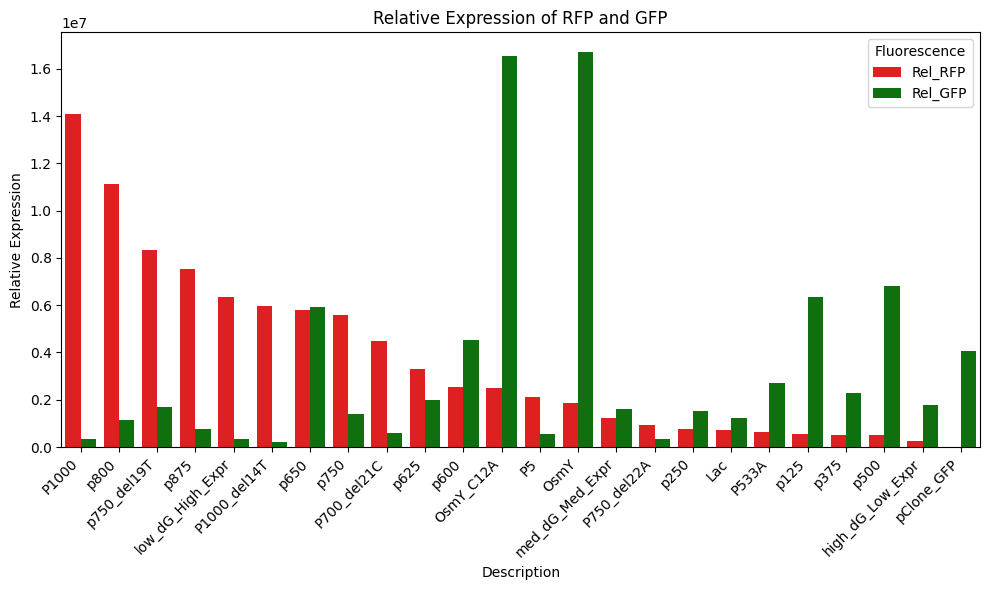

In [5]:
RFP_df = merged_df[['Ec', 'Media', 'Rel_RFP', 'Description', 'sequence']].copy()
GFP_df = merged_df[['Ec', 'Media', 'Rel_GFP', 'Description', 'sequence']].copy()

RFP_df = RFP_df.rename(columns={'Rel_RFP': 'Relative Expression'})
GFP_df = GFP_df.rename(columns={'Rel_GFP': 'Relative Expression'})

RFP_df['Fluorescence'] = 'Rel_RFP'
GFP_df['Fluorescence'] = 'Rel_GFP'

RFP_df = RFP_df[RFP_df['Media'] == 'M9']
GFP_df = GFP_df[GFP_df['Media'] == 'PBS_LB']

RFP_df = RFP_df.groupby(['Ec', 'Media', 'Description', 'Fluorescence', 'sequence']).agg({'Relative Expression': 'mean'}).reset_index()
GFP_df = GFP_df.groupby(['Ec', 'Media', 'Description', 'Fluorescence', 'sequence']).agg({'Relative Expression': 'mean'}).reset_index()

ordered_descriptions = RFP_df.sort_values('Relative Expression', ascending=False)['Description']

concatenated_df = pd.concat([RFP_df, GFP_df], ignore_index=True)

palette = {'Rel_RFP': 'red', 'Rel_GFP': 'green'}

plt.figure(figsize=(10, 6))
sns.barplot(data=concatenated_df, x='Description', y='Relative Expression', hue='Fluorescence',
            palette=palette, order=ordered_descriptions)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Description')
plt.ylabel('Relative Expression')
plt.title('Relative Expression of RFP and GFP')
plt.legend(title='Fluorescence')
plt.tight_layout()
plt.show()


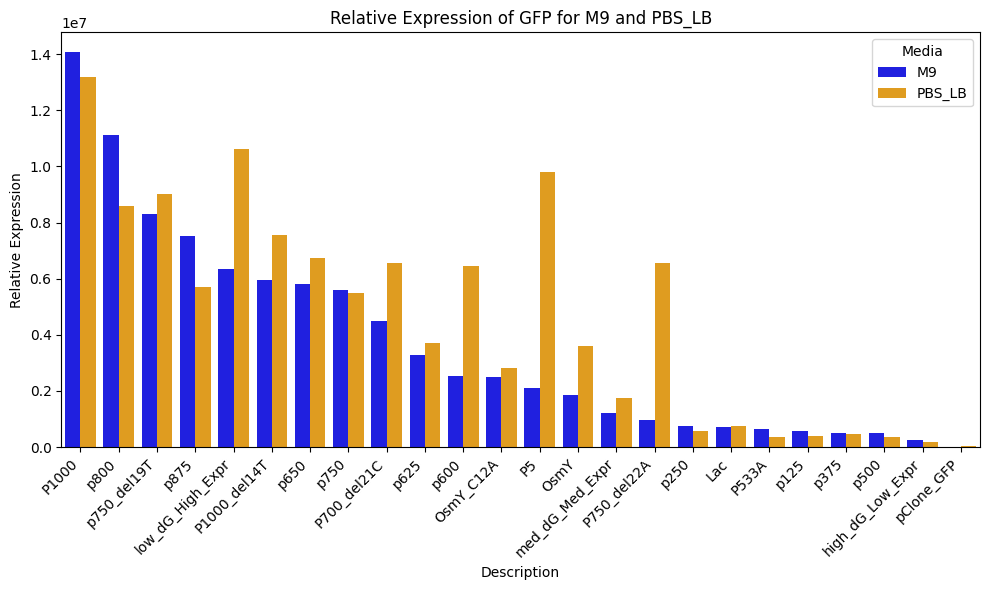

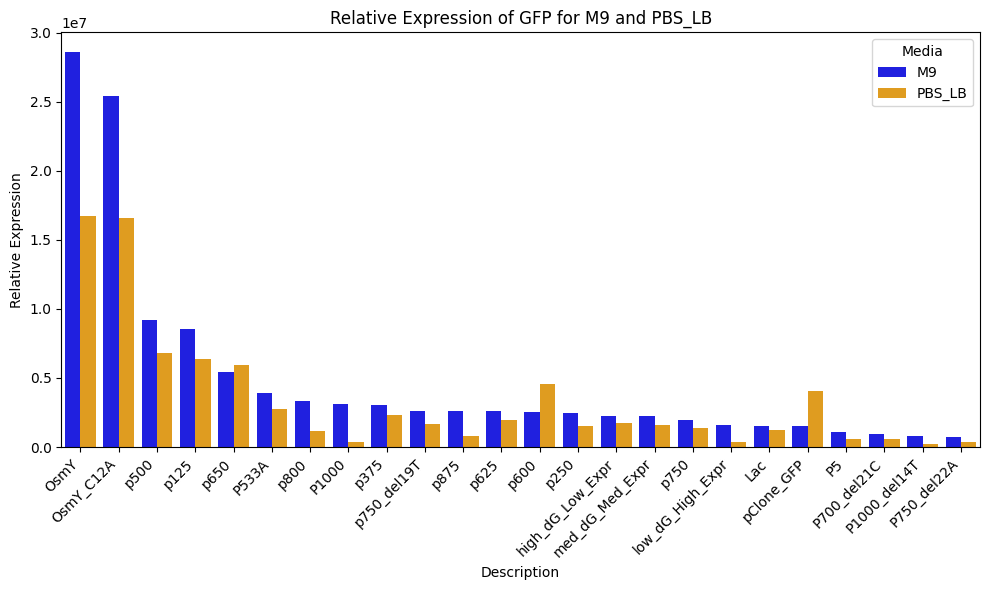

In [6]:
for fluorescence in ['Rel_RFP', 'Rel_GFP']:
    LB_df = merged_df[merged_df['Media'] == 'M9']
    M9_df = merged_df[merged_df['Media'] == 'PBS_LB']

    LB_df = LB_df.groupby(['Ec', 'Media', 'Description']).agg({fluorescence: 'mean'}).reset_index()
    M9_df = M9_df.groupby(['Ec', 'Media', 'Description']).agg({fluorescence: 'mean'}).reset_index()

    ordered_descriptions = LB_df.sort_values(fluorescence, ascending=False)['Description']

    concatenated_df = pd.concat([LB_df, M9_df], ignore_index=True)

    palette = {'M9': 'blue', 'PBS_LB': 'orange'}

    plt.figure(figsize=(10, 6))
    sns.barplot(data=concatenated_df, x='Description', y=fluorescence, hue='Media',
                palette=palette, order=ordered_descriptions)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Description')
    plt.ylabel('Relative Expression')
    plt.title('Relative Expression of GFP for M9 and PBS_LB')
    plt.legend(title='Media')
    plt.tight_layout()
    plt.show()


In [7]:
def pad_GA(sequence):
    sequence = sequence.replace('_', '')
    desired_length = 150
    
    # add sepcial padding for GFP (not inserted in the plasmid)
    if sequence == 'CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT':
        upstream = 'TATCATGCCATACCGCGAAAGGTTTTGCACCATT'
    else:
        upstream = 'AATACTAGAGGTCTTCCGAC'

    downstream = 'GCGGGAAGACAACTAGGGG'
    sequence = upstream + sequence + downstream
    return sequence.zfill(desired_length)

def one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = [mapping[nucleotide.upper()] for nucleotide in sequence]
    return encoding

def reverse_complement(sequence):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', '0': '0'}
    reversed_sequence = ''.join(complement[nucleotide] for nucleotide in sequence[::-1])
    return reversed_sequence

In [8]:
model = keras.saving.load_model('Models/CNN_6_1_2.keras')

RFP_sequences = merged_df['sequence'].apply(lambda x: pad_GA(x)).tolist()
GFP_sequences = [reverse_complement(seq) for seq in RFP_sequences]

RFP_sequences = np.array([one_hot_encode(seq) for seq in RFP_sequences])
GFP_sequences = np.array([one_hot_encode(seq) for seq in GFP_sequences])

merged_df['Pred_RFP'] = model.predict(RFP_sequences).flatten()
merged_df['Pred_GFP'] = model.predict(GFP_sequences).flatten()

merged_df.head()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Date,Time,Media,Ec,OD600,Ex485Em535,Ex550Em630,Description,sequence,Rel_GFP,Rel_RFP,Pred_RFP,Pred_GFP
0,2025_04_25,330_PM,M9,33,0.314510,383540.0,5355.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.219483e+06,1.702805e+04,0.266440,0.160737
1,2025_04_25,330_PM,M9,33,0.340022,388601.0,4213.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.142869e+06,1.239184e+04,0.266440,0.160737
2,2025_04_25,330_PM,M9,34,0.180372,472020.0,92525.5,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,2.616918e+06,5.129690e+05,0.379630,0.248814
3,2025_04_25,330_PM,M9,34,0.170433,467968.0,83579.5,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,2.745755e+06,4.903944e+05,0.379630,0.248814
4,2025_04_25,330_PM,M9,35,0.083273,124494.0,337765.5,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,1.495011e+06,4.056124e+06,0.471274,0.238489


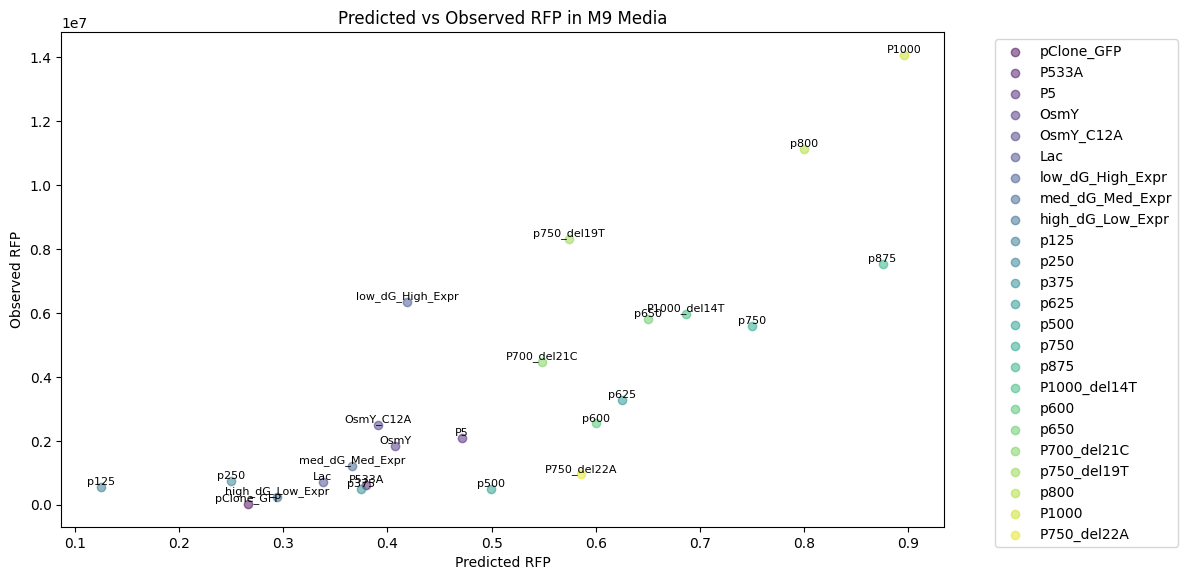

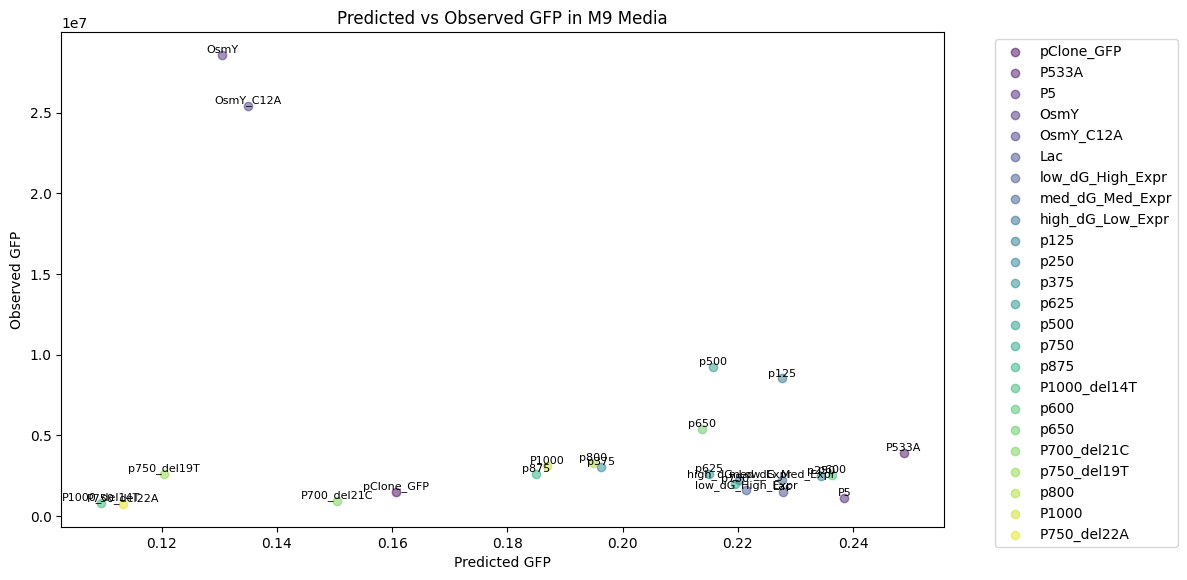

In [14]:
averaged_df = merged_df[merged_df['Media'] == 'M9']
averaged_df = averaged_df.groupby(['Ec', 'Description', 'sequence']).agg(
    {'Rel_RFP': 'mean', 'Rel_GFP': 'mean', 'Pred_RFP': 'mean', 'Pred_GFP': 'mean'}).reset_index()

for fluorescence in ['RFP', 'GFP']:

    predicted = f'Pred_{fluorescence}'
    observed = f'Rel_{fluorescence}'

    unique_descriptions = averaged_df['Description'].unique()
    cmap = plt.get_cmap('viridis')
    color_map = {desc: cmap(i / len(unique_descriptions)) for i, desc in enumerate(unique_descriptions)}

    plt.figure(figsize=(12, 6))

    for _, row in averaged_df.iterrows():
        plt.scatter(
            row[predicted], row[observed],
            color=color_map[row['Description']],
            alpha=0.5,
            label=row['Description']
        )
        plt.text(row[predicted], row[observed], row['Description'], fontsize=8, ha='center', va='bottom')

    plt.xlabel(f'Predicted {fluorescence}')
    plt.ylabel(f'Observed {fluorescence}')
    plt.title(f'Predicted vs Observed {fluorescence} in M9 Media')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

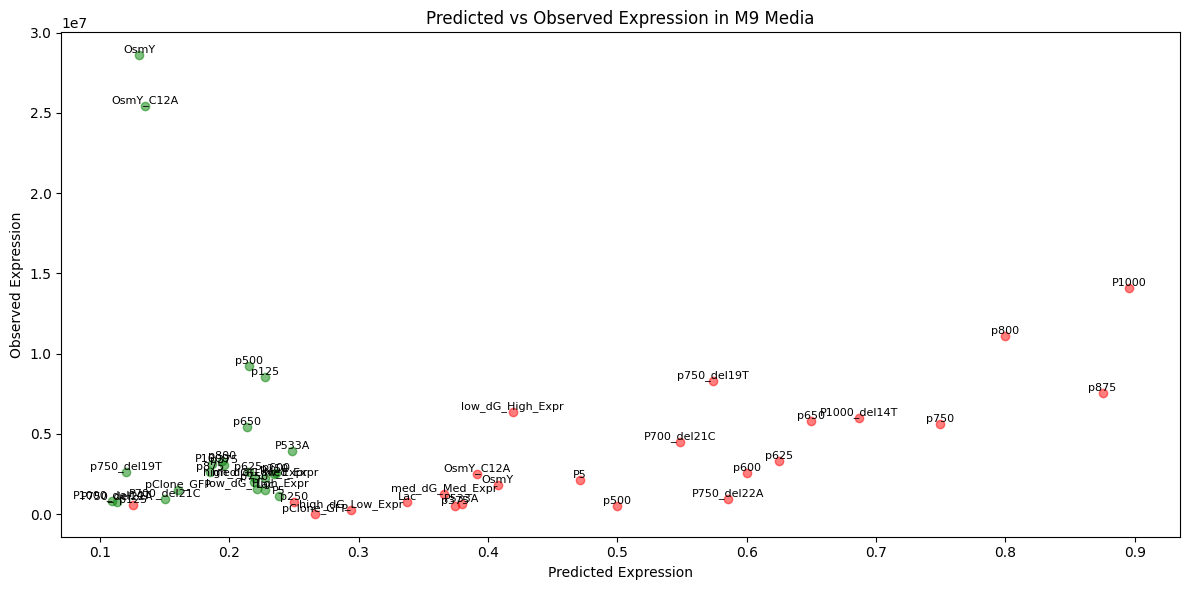

In [17]:
averaged_df = merged_df[merged_df['Media'] == 'M9']
averaged_df = averaged_df.groupby(['Ec', 'Description', 'sequence']).agg(
    {'Rel_RFP': 'mean', 'Rel_GFP': 'mean', 'Pred_RFP': 'mean', 'Pred_GFP': 'mean'}).reset_index()

color_map = {'RFP': 'red', 'GFP': 'green'}

plt.figure(figsize=(12, 6))

for fluorescence in ['RFP', 'GFP']:

    predicted = f'Pred_{fluorescence}'
    observed = f'Rel_{fluorescence}'

    for _, row in averaged_df.iterrows():
        plt.scatter(
            row[predicted], row[observed],
            color=color_map[fluorescence],
            alpha=0.5,
            label=row['Description']
        )
        plt.text(row[predicted], row[observed], row['Description'], fontsize=8, ha='center', va='bottom')

plt.xlabel('Predicted Expression')
plt.ylabel('Observed Expression')
plt.title('Predicted vs Observed Expression in M9 Media')
plt.tight_layout()
plt.show()

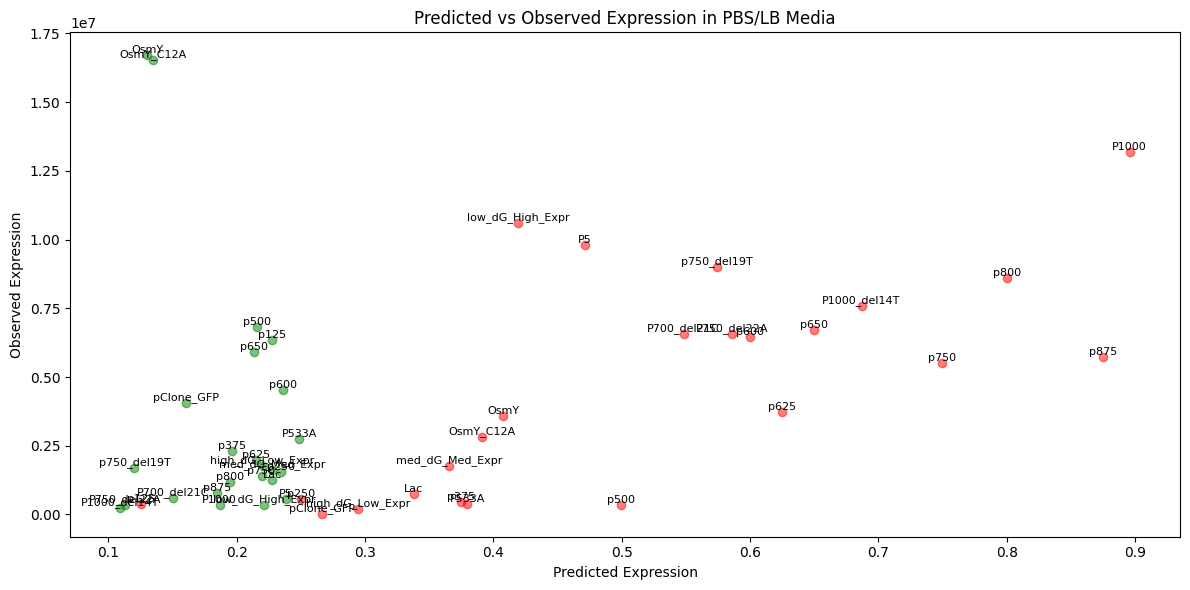

In [18]:
averaged_df = merged_df[merged_df['Media'] == 'PBS_LB']
averaged_df = averaged_df.groupby(['Ec', 'Description', 'sequence']).agg(
    {'Rel_RFP': 'mean', 'Rel_GFP': 'mean', 'Pred_RFP': 'mean', 'Pred_GFP': 'mean'}).reset_index()

color_map = {'RFP': 'red', 'GFP': 'green'}

plt.figure(figsize=(12, 6))

for fluorescence in ['RFP', 'GFP']:

    predicted = f'Pred_{fluorescence}'
    observed = f'Rel_{fluorescence}'

    for _, row in averaged_df.iterrows():
        plt.scatter(
            row[predicted], row[observed],
            color=color_map[fluorescence],
            alpha=0.5,
            label=row['Description']
        )
        plt.text(row[predicted], row[observed], row['Description'], fontsize=8, ha='center', va='bottom')

plt.xlabel('Predicted Expression')
plt.ylabel('Observed Expression')
plt.title('Predicted vs Observed Expression in PBS/LB Media')
plt.tight_layout()
plt.show()